<a href="https://colab.research.google.com/github/dmousa75/stqd6014-Data-Science/blob/main/Copy_of_Week12_DataAggregation_20250104_WC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Week 12: Data Aggregation and Group Operation**
Please refer to the textbook: **"Python for Data Analysis"** by Wes McKinney for details of this topic on **Chapter 10**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Start by importing NumPy and pandas**

# **Like a template**

In [2]:
import numpy as np
import pandas as pd

# **13.1 Groupby Operations**
## The popular ***split-apply-combine***

In [5]:
# Example DataFrame
rng = np.random.default_rng(seed=12345)
df = pd.DataFrame({'key1' : ['a', 'a', None, 'b', 'b', 'a', None],
                   'key2' : pd.Series([1, 2, 1, 2, 1, None, 1], dtype='Int64'),
                   'data1' : rng.standard_normal(7),
                   'data2' : rng.standard_normal(7)})
df

,key1,key2,data1,data2
0,a,1,-1.423825,0.648893
1,a,2,1.263728,0.361058
2,None,1,-0.870662,-1.952863
3,b,2,-0.259173,2.347410
4,b,1,-0.075343,0.968497
5,a,<NA>,-0.740885,-0.759387
6,None,1,-1.367793,0.902198


### **Create intermediate file first**

In [10]:
# Access data1 and call groupby with the key1 column
# Create an intermediate file -> does not directly display the data
grouped = df['data1'].groupby(df['key1'])
grouped.apply(lambda x:x)#check the values in column 'data1' after group by

key1   
a     0   -1.423825
      1    1.263728
      5   -0.740885
b     3   -0.259173
      4   -0.075343
Name: data1, dtype: float64

In [11]:
# Do median computation
grouped.median()

,data1
key1,
a,-0.740885
b,-0.167258


In [ ]:
# Method 1: We create explicitly the intermediate file
# Compute median
# groupby create an intermediate result
# Where we can work on
%timeit grouped = df['data1'].groupby(df['key1']); grouped.median()#The goal is likely to evaluate the performance of this grouping and median calculation.The goal is likely to evaluate the performance of this grouping and median calculation.

434 µs ± 37 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### **Without intermediate file (the unwrap method)**

In [ ]:
# Method 2: We unwrap the intermediate file
# Summarize and analyze data by groups
%timeit df['data1'].groupby(df['key1']).median()

503 µs ± 54.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### **In actual case**....
**The unwrap method supposingly should run faster**

### **Passing multiple keys**

In [12]:
# Another example: passing multiple groupby arrays of keys to find mean
# Long format
means = df['data1'].groupby([df['key1'], df['key2']]).mean()
means

key1  key2
a     1      -1.423825
      2       1.263728
b     1      -0.075343
      2      -0.259173
Name: data1, dtype: float64

In [ ]:
# Unstack -> wide format
means.unstack()

key2,1,2
key1,,
a,-1.423825,1.263728
b,-0.075343,-0.259173


In [13]:
# Display df content
df

,key1,key2,data1,data2
0,a,1,-1.423825,0.648893
1,a,2,1.263728,0.361058
2,None,1,-0.870662,-1.952863
3,b,2,-0.259173,2.347410
4,b,1,-0.075343,0.968497
5,a,<NA>,-0.740885,-0.759387
6,None,1,-1.367793,0.902198


from matplotlib import pyplot as plt
df['key2'].plot(kind='hist', bins=20, title='key2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['data1'].plot(kind='hist', bins=20, title='data1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['data2'].plot(kind='hist', bins=20, title='data2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('key1').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='key2', y='data1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='data1', y='data2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['key2'].plot(kind='line', figsize=(8, 4), title='key2')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['data1'].plot(kind='line', figsize=(8, 4), title='data1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['data2'].plot(kind='line', figsize=(8, 4), title='data2')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['key1'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='key2', y='key1', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['key1'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='data1', y='key1', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['key1'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='data2', y='key1', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [14]:
# Pass column name as the group keys
# The unwrap method
df.groupby('key1').mean()

,key2,data1,data2
key1,,,
a,1.5,-0.300327,0.083521
b,1.5,-0.167258,1.657953


In [ ]:
# Combination of keys
# The unwrap method
df.groupby(['key1', 'key2']).mean()

data1     data2
key1 key2                    
a    1    -1.423825  0.648893
     2     1.263728  0.361058
b    1    -0.075343  0.968497
     2    -0.259173  2.347410

In [ ]:
# Returns a Series containing group sizes:
df.groupby(['key1', 'key2']).size()

key1  key2
a     1       1
      2       1
b     1       1
      2       1
dtype: int64

In [ ]:
# Display content
df

,key1,key2,data1,data2
0,a,1,-1.423825,0.648893
1,a,2,1.263728,0.361058
2,None,1,-0.870662,-1.952863
3,b,2,-0.259173,2.347410
4,b,1,-0.075343,0.968497
5,a,<NA>,-0.740885,-0.759387
6,None,1,-1.367793,0.902198


In [15]:
# Missing values in a group key are excluded from the result by default
# Can be disabled by passing dropna=False to groupby
# dropna=True is by default
df.groupby('key1').size()

,0
key1,
a,3
b,2


In [16]:
# dropna=False, size= gives the total numbers of element regardless where they are missing or not
df.groupby(['key1', 'key2'], dropna=False).size()

key1  key2
a     1       1
      2       1
      <NA>    1
b     1       1
      2       1
NaN   1       2
dtype: int64

In [ ]:
# Can use count as well
# Count itself remove the NA by default
df.groupby(['key1', 'key2'])['data1'].count()

key1  key2
a     1       1
      2       1
b     1       1
      2       1
Name: data1, dtype: int64

## **Notes**


*   `size()` gives the **total number of elements**, **regardless of whether they are missing or not**.
*   `count()` gives the number of **valid (non-missing) elements**.



### **Iterating over Groups**
***groupby*** supports ***iteration***, generating ***a sequence of 2-tuples (a pair of values)***

In [17]:
# Display df content
df

,key1,key2,data1,data2
0,a,1,-1.423825,0.648893
1,a,2,1.263728,0.361058
2,None,1,-0.870662,-1.952863
3,b,2,-0.259173,2.347410
4,b,1,-0.075343,0.968497
5,a,<NA>,-0.740885,-0.759387
6,None,1,-1.367793,0.902198


In [18]:
# Iteration
for name, group in df.groupby('key1'):
    print(name)
    print(group)

a
  key1  key2     data1     data2
0    a     1 -1.423825  0.648893
1    a     2  1.263728  0.361058
5    a  <NA> -0.740885 -0.759387
b
  key1  key2     data1     data2
3    b     2 -0.259173  2.347410
4    b     1 -0.075343  0.968497


In [19]:
# In the case of multiple keys, first element in the tuple will be
# a tuple of key values
for (k1, k2), group in df.groupby(['key1', 'key2']):
    print((k1, k2))
    print(group)

('a', 1)
  key1  key2     data1     data2
0    a     1 -1.423825  0.648893
('a', 2)
  key1  key2     data1     data2
1    a     2  1.263728  0.361058
('b', 1)
  key1  key2     data1     data2
4    b     1 -0.075343  0.968497
('b', 2)
  key1  key2     data1    data2
3    b     2 -0.259173  2.34741


In [20]:
# Computing a dictionary using one-liner
# disctionary: key:value pair
pieces = {name: group for name, group in df.groupby('key1')}

In [21]:
# Accessing item in dictionary
# Given the particular key -> 'a' or 'b'
pieces['a']

,key1,key2,data1,data2
0,a,1,-1.423825,0.648893
1,a,2,1.263728,0.361058
5,a,<NA>,-0.740885,-0.759387


In [22]:
# Accessing item in dictionary
pieces['b']

,key1,key2,data1,data2
3,b,2,-0.259173,2.347410
4,b,1,-0.075343,0.968497


### **Selecting a Column or Subset of Columns**

In [23]:
# Returned a DataFrame if a list or array is passed
df.groupby(['key1', 'key2'])['data2'].mean()

key1  key2
a     1       0.648893
      2       0.361058
b     1       0.968497
      2       2.347410
Name: data2, dtype: float64

### **Grouping with Dictionaries and Series**

In [25]:
# Example DataFrame
# Setting the seed number to ensure reproducibility
rng = np.random.default_rng(seed=12345)
people = pd.DataFrame(rng.standard_normal((5, 5)),
                      columns=['a', 'b', 'c', 'd', 'e'],
                      index=['Joe', 'Steve', 'Wanda', 'Jill', 'Trey'])
people

,a,b,c,d,e
Joe,-1.423825,1.263728,-0.870662,-0.259173,-0.075343
Steve,-0.740885,-1.367793,0.648893,0.361058,-1.952863
Wanda,2.347410,0.968497,-0.759387,0.902198,-0.466953
Jill,-0.060690,0.788844,-1.256668,0.575858,1.398979
Trey,1.322298,-0.299699,0.902919,-1.621583,-0.158189


In [26]:
# Add a few NA values
# using loc() function -> label-based indexing
people.loc['Wanda', ['b', 'c']] = np.nan
people

,a,b,c,d,e
Joe,-1.423825,1.263728,-0.870662,-0.259173,-0.075343
Steve,-0.740885,-1.367793,0.648893,0.361058,-1.952863
Wanda,2.347410,NaN,NaN,0.902198,-0.466953
Jill,-0.060690,0.788844,-1.256668,0.575858,1.398979
Trey,1.322298,-0.299699,0.902919,-1.621583,-0.158189


In [ ]:
# Display the people content
people

,a,b,c,d,e
Joe,-1.423825,1.263728,-0.870662,-0.259173,-0.075343
Steve,-0.740885,-1.367793,0.648893,0.361058,-1.952863
Wanda,2.347410,NaN,NaN,0.902198,-0.466953
Jill,-0.060690,0.788844,-1.256668,0.575858,1.398979
Trey,1.322298,-0.299699,0.902919,-1.621583,-0.158189


In [ ]:
# Using iloc
# first tuple (4, 1) indicates the row indices
# second tuple (0, 3) indicates the column indices
people.iloc[(4, 1), (0, 3)] = np.nan
people

,a,b,c,d,e
Joe,-1.423825,1.263728,-0.870662,-0.259173,-0.075343
Steve,-0.740885,-1.367793,0.648893,NaN,-1.952863
Wanda,2.347410,NaN,NaN,0.902198,-0.466953
Jill,-0.060690,0.788844,-1.256668,0.575858,1.398979
Trey,NaN,-0.299699,0.902919,-1.621583,-0.158189


In [ ]:
# Add a few NA values
# uisng iloc; "i" -> integer basis
people.iloc[2:3, [3]] = np.nan
people

,a,b,c,d,e
Joe,-1.423825,1.263728,-0.870662,-0.259173,-0.075343
Steve,-0.740885,-1.367793,0.648893,NaN,-1.952863
Wanda,2.347410,NaN,NaN,NaN,-0.466953
Jill,-0.060690,0.788844,-1.256668,0.575858,1.398979
Trey,NaN,-0.299699,0.902919,-1.621583,-0.158189


In [ ]:
# Group correspondence for the columns
# A dictionary
mapping = {'a': 'red', 'b': 'red', 'c': 'blue',
           'd': 'blue', 'e': 'red', 'f' : 'orange', 'g' : 'violet'}

In [ ]:
# Aggregate -> first we do a groupby, then we did something on the groupby obj
# people.T -> doing a transpose; people names would be transpose as column name
# without transpose; blue and red is the row indeces
people.T.groupby(mapping).sum().T

,blue,red
Joe,-1.129835,-0.235440
Steve,0.648893,-4.061540
Wanda,0.000000,1.880456
Jill,-0.680811,2.127134
Trey,-0.718663,-0.457888


In [ ]:
# Assign new columns to a DataFrame
# add the column f and g
rng = np.random.default_rng(seed=12345)
people = people.assign(f = rng.standard_normal((5, 1)),
                       g = rng.standard_normal((5, 1)))
people

,a,b,c,d,e,f,g
Joe,-1.423825,1.263728,-0.870662,-0.259173,-0.075343,-1.423825,-0.740885
Steve,-0.740885,-1.367793,0.648893,NaN,-1.952863,1.263728,-1.367793
Wanda,2.347410,NaN,NaN,NaN,-0.466953,-0.870662,0.648893
Jill,-0.060690,0.788844,-1.256668,0.575858,1.398979,-0.259173,0.361058
Trey,NaN,-0.299699,0.902919,-1.621583,-0.158189,-0.075343,-1.952863


In [ ]:
# Get documentation for assign() function
# Another way to create a new column
#people.assign?

In [ ]:
# Sum
people.T.groupby(mapping).sum().T

,blue,orange,red,violet
Joe,-1.129835,-1.423825,-0.235440,-0.740885
Steve,0.648893,1.263728,-4.061540,-1.367793
Wanda,0.000000,-0.870662,1.880456,0.648893
Jill,-0.680811,-0.259173,2.127134,0.361058
Trey,-0.718663,-0.075343,-0.457888,-1.952863


In [ ]:
# Create a Series
map_series = pd.Series(mapping)
map_series

,0
a,red
b,red
c,blue
d,blue
e,red
f,orange
g,violet


In [ ]:
# Count
people.T.groupby(map_series).count().T

,blue,orange,red,violet
Joe,2,1,3,1
Steve,1,1,3,1
Wanda,0,1,2,1
Jill,2,1,3,1
Trey,2,1,2,1


### **Grouping with Functions**

In [ ]:
# Display content
people

,a,b,c,d,e,f,g
Joe,-1.423825,1.263728,-0.870662,-0.259173,-0.075343,-1.423825,-0.740885
Steve,-0.740885,-1.367793,0.648893,NaN,-1.952863,1.263728,-1.367793
Wanda,2.347410,NaN,NaN,NaN,-0.466953,-0.870662,0.648893
Jill,-0.060690,0.788844,-1.256668,0.575858,1.398979,-0.259173,0.361058
Trey,NaN,-0.299699,0.902919,-1.621583,-0.158189,-0.075343,-1.952863


In [ ]:
# Groupby based on the length of the index labels
# based on number of characters of the index
people.groupby(len).sum()

,a,b,c,d,e,f,g
3,-1.423825,1.263728,-0.870662,-0.259173,-0.075343,-1.423825,-0.740885
4,-0.060690,0.489146,-0.353749,-1.045725,1.240790,-0.334517,-1.591805
5,1.606525,-1.367793,0.648893,0.000000,-2.419816,0.393067,-0.718900


In [ ]:
# Mixing functions with arrays, dictionaries, or series
key_list = ['one', 'one', 'one', 'two', 'two']
people.groupby([len, key_list]).max()

,,a,b,c,d,e,f,g
3,one,-1.423825,1.263728,-0.870662,-0.259173,-0.075343,-1.423825,-0.740885
4,two,-0.060690,0.788844,0.902919,0.575858,1.398979,-0.075343,0.361058
5,one,2.347410,-1.367793,0.648893,NaN,-0.466953,1.263728,0.648893


# **13.2 Data Aggregation function**

In [ ]:
# DataFrame from previous example
df

,key1,key2,data1,data2
0,a,1,-1.423825,0.648893
1,a,2,1.263728,0.361058
2,None,1,-0.870662,-1.952863
3,b,2,-0.259173,2.347410
4,b,1,-0.075343,0.968497
5,a,<NA>,-0.740885,-0.759387
6,None,1,-1.367793,0.902198


In [ ]:
# Selects the smallest requested number
# nsmallest(2) is the aggregation function
grouped = df.groupby('key1')
grouped['data1'].nsmallest(3)

key1   
a     0   -1.423825
      5   -0.740885
      1    1.263728
b     3   -0.259173
      4   -0.075343
Name: data1, dtype: float64

In [ ]:
# Define own aggregation functions
def peak_to_peak(arr):
    return arr.max() - arr.min()

In [ ]:
# agg: aggregate
# apply the function to the dataframe
grouped.agg(peak_to_peak)

,data1
key1,
a,2.687553
b,0.183830


In [ ]:
# Another way
grouped.describe()

,count,mean,std,min,25%,50%,75%,max
key1,,,,,,,,
a,3.0,-0.300327,1.396891,-1.423825,-1.082355,-0.740885,0.261422,1.263728
b,2.0,-0.167258,0.129987,-0.259173,-0.213216,-0.167258,-0.121301,-0.075343


## **Column-Wise and Multiple Function Application**

In [ ]:
# Get the tipping dataset from github
# Download here: https://bit.ly/3VyE0vP
tips = pd.read_csv('https://bit.ly/3VyE0vP')
tips

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


In [ ]:
# Add additional column
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,No,Sat,Dinner,2,0.098204


In [ ]:
# Group the tips by day and smoker
grouped = tips.groupby(['day', 'smoker'])

In [ ]:
# Get descriptive statistics
grouped_pct = grouped['tip_pct']
grouped_pct.agg('mean') # aggregation part

day   smoker
Fri   No        0.151650
      Yes       0.174783
Sat   No        0.158048
      Yes       0.147906
Sun   No        0.160113
      Yes       0.187250
Thur  No        0.160298
      Yes       0.163863
Name: tip_pct, dtype: float64

In [ ]:
# Getting back a DataFrame
grouped_pct.agg(['mean', 'std', peak_to_peak])

mean       std  peak_to_peak
day  smoker                                  
Fri  No      0.151650  0.028123      0.067349
     Yes     0.174783  0.051293      0.159925
Sat  No      0.158048  0.039767      0.235193
     Yes     0.147906  0.061375      0.290095
Sun  No      0.160113  0.042347      0.193226
     Yes     0.187250  0.154134      0.644685
Thur No      0.160298  0.038774      0.193350
     Yes     0.163863  0.039389      0.151240

In [ ]:
# Another example
grouped_pct.agg([('PURATA', 'mean'), ('STDdev', 'std')]) # 'mean' & 'std' are the functions

PURATA    STDdev
day  smoker                    
Fri  No      0.151650  0.028123
     Yes     0.174783  0.051293
Sat  No      0.158048  0.039767
     Yes     0.147906  0.061375
Sun  No      0.160113  0.042347
     Yes     0.187250  0.154134
Thur No      0.160298  0.038774
     Yes     0.163863  0.039389

In [ ]:
# Specify a list of functions to apply the aggregation
functions = ['count', 'mean', 'max', 'min', 'median']
result = grouped[['tip_pct', 'total_bill']].agg(functions)
result

tip_pct                                         total_bill  \
              count      mean       max       min    median      count   
day  smoker                                                              
Fri  No           4  0.151650  0.187735  0.120385  0.149241          4   
     Yes         15  0.174783  0.263480  0.103555  0.173913         15   
Sat  No          45  0.158048  0.291990  0.056797  0.150152         45   
     Yes         42  0.147906  0.325733  0.035638  0.153624         42   
Sun  No          57  0.160113  0.252672  0.059447  0.161665         57   
     Yes         19  0.187250  0.710345  0.065660  0.138122         19   
Thur No          45  0.160298  0.266312  0.072961  0.153492         45   
     Yes         17  0.163863  0.241255  0.090014  0.153846         17   

                                              
                  mean    max    min  median  
day  smoker                                   
Fri  No      18.420000  22.75  12.46  19.235  
     Yes     16.813333  40.17   5.75  13.420  
Sat  No      19.661778  48.33   7.25  17.820  
     Yes     21.276667  50.81   3.07  20.390  
Sun  No      20.506667  48.17   8.77  18.430  
     Yes     24.120000  45.35   7.25  23.100  
Thur No      17.113111  41.19   7.51  15.950  
     Yes     19.190588  43.11  10.34  16.470

In [ ]:
# Passing a list of tuples
# tuple -> '()'
ftuples = [('AVERAGE', 'mean'), ('VARIANCE', 'var')]
grouped[['tip_pct', 'total_bill']].agg(ftuples)

tip_pct           total_bill            
              AVERAGE  VARIANCE    AVERAGE    VARIANCE
day  smoker                                           
Fri  No      0.151650  0.000791  18.420000   25.596333
     Yes     0.174783  0.002631  16.813333   82.562438
Sat  No      0.158048  0.001581  19.661778   79.908965
     Yes     0.147906  0.003767  21.276667  101.387535
Sun  No      0.160113  0.001793  20.506667   66.099980
     Yes     0.187250  0.023757  24.120000  109.046044
Thur No      0.160298  0.001503  17.113111   59.625081
     Yes     0.163863  0.001551  19.190588   69.808518

In [ ]:
# Apply different functions using a dictionary
# dictionary -> {key-value pair}
grouped.agg({'tip' : 'max', 'size' : 'sum'})

tip  size
day  smoker             
Fri  No       3.50     9
     Yes      4.73    31
Sat  No       9.00   115
     Yes     10.00   104
Sun  No       6.00   167
     Yes      6.50    49
Thur No       6.70   112
     Yes      5.00    40

# **13.3 Apply: General split-apply-combine**

In [ ]:
# Define a function to select the top five tip_pct values by group
def top(df, n=5, column='tip_pct'):
    return df.sort_values(column, ascending=False)[:n]

In [ ]:
# Get top 8
top(tips, n=8)

,total_bill,tip,smoker,day,time,size,tip_pct
172,7.25,5.15,Yes,Sun,Dinner,2,0.710345
178,9.60,4.00,Yes,Sun,Dinner,2,0.416667
67,3.07,1.00,Yes,Sat,Dinner,1,0.325733
232,11.61,3.39,No,Sat,Dinner,2,0.291990
183,23.17,6.50,Yes,Sun,Dinner,4,0.280535
109,14.31,4.00,Yes,Sat,Dinner,2,0.279525
149,7.51,2.00,No,Thur,Lunch,2,0.266312
93,16.32,4.30,Yes,Fri,Dinner,2,0.263480


In [ ]:
# Groupby smoker
tips.groupby('smoker').apply(top, include_groups=False)

total_bill   tip   day    time  size   tip_pct
smoker                                                    
No     232       11.61  3.39   Sat  Dinner     2  0.291990
       149        7.51  2.00  Thur   Lunch     2  0.266312
       51        10.29  2.60   Sun  Dinner     2  0.252672
       185       20.69  5.00   Sun  Dinner     5  0.241663
       88        24.71  5.85  Thur   Lunch     2  0.236746
Yes    172        7.25  5.15   Sun  Dinner     2  0.710345
       178        9.60  4.00   Sun  Dinner     2  0.416667
       67         3.07  1.00   Sat  Dinner     1  0.325733
       183       23.17  6.50   Sun  Dinner     4  0.280535
       109       14.31  4.00   Sat  Dinner     2  0.279525

In [ ]:
# Pass additional argument after the function
# include_groups=False exclude 'smoker' & 'day' frm the data that top() operates
tips.groupby(['smoker', 'day']).apply(top, n=3, column='total_bill',
                                      include_groups=False)

total_bill    tip    time  size   tip_pct
smoker day                                                
No     Fri  94        22.75   3.25  Dinner     2  0.142857
            91        22.49   3.50  Dinner     2  0.155625
            223       15.98   3.00   Lunch     3  0.187735
       Sat  212       48.33   9.00  Dinner     4  0.186220
            59        48.27   6.73  Dinner     4  0.139424
            23        39.42   7.58  Dinner     4  0.192288
       Sun  156       48.17   5.00  Dinner     6  0.103799
            112       38.07   4.00  Dinner     3  0.105070
            11        35.26   5.00  Dinner     4  0.141804
       Thur 142       41.19   5.00   Lunch     5  0.121389
            85        34.83   5.17   Lunch     4  0.148435
            141       34.30   6.70   Lunch     6  0.195335
Yes    Fri  95        40.17   4.73  Dinner     4  0.117750
            90        28.97   3.00  Dinner     2  0.103555
            96        27.28   4.00  Dinner     2  0.146628
       Sat  170       50.81  10.00  Dinner     3  0.196812
            102       44.30   2.50  Dinner     3  0.056433
            207       38.73   3.00  Dinner     4  0.077459
       Sun  182       45.35   3.50  Dinner     3  0.077178
            184       40.55   3.00  Dinner     2  0.073983
            180       34.65   3.68  Dinner     4  0.106205
       Thur 197       43.11   5.00   Lunch     4  0.115982
            83        32.68   5.00   Lunch     2  0.152999
            192       28.44   2.56   Lunch     2  0.090014

In [ ]:
# Earlier example: Wide format
# describe() -> quick way of getting statistic data
result = tips.groupby('smoker')['tip_pct'].describe()
result

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
No,151.0,0.159328,0.039910,0.056797,0.136906,0.155625,0.185014,0.291990
Yes,93.0,0.163196,0.085119,0.035638,0.106771,0.153846,0.195059,0.710345


In [ ]:
# Unstack: long format
result.unstack('smoker')

smoker
count  No        151.000000
       Yes        93.000000
mean   No          0.159328
       Yes         0.163196
std    No          0.039910
       Yes         0.085119
min    No          0.056797
       Yes         0.035638
25%    No          0.136906
       Yes         0.106771
50%    No          0.155625
       Yes         0.153846
75%    No          0.185014
       Yes         0.195059
max    No          0.291990
       Yes         0.710345
dtype: float64

## **Quantile and Bucket Analysis**

In [ ]:
# Another example
rng = np.random.default_rng(seed=12345)
frame = pd.DataFrame({'data1': rng.standard_normal(1000),
                      'data2': rng.standard_normal(1000)})
frame.head()

,data1,data2
0,-1.423825,-1.176622
1,1.263728,1.205009
2,-0.870662,0.717879
3,-0.259173,-2.686273
4,-0.075343,-1.865260


In [ ]:
# Split into quartile
# '(' -> parenthesis is exclusive / not included
# ']' -> bracket is inclusive / it is included
quartiles = pd.cut(frame['data1'], 4)
print(frame.head())
quartiles.head()

      data1     data2
0 -1.423825 -1.176622
1  1.263728  1.205009
2 -0.870662  0.717879
3 -0.259173 -2.686273
4 -0.075343 -1.865260


,data1
0,"(-1.537, 0.0459]"
1,"(0.0459, 1.629]"
2,"(-1.537, 0.0459]"
3,"(-1.537, 0.0459]"
4,"(-1.537, 0.0459]"


In [ ]:
# Passing a function
def get_stats(group):
    return pd.DataFrame(
        {'min': group.min(), 'max': group.max(), 'count': group.count(),
         'mean': group.mean()}
    )

In [ ]:
# Create a groupby intermediate file
grouped = frame.groupby(quartiles, observed=True)

In [ ]:
# Get the statistics
grouped.apply(get_stats)

min       max  count      mean
data1                                                      
(-3.126, -1.537] data1 -3.119609 -1.538154     65 -2.019675
                 data2 -2.433466  2.040796     65  0.033381
(-1.537, 0.0459] data1 -1.523449  0.045684    443 -0.605092
                 data2 -2.830704  3.721098    443  0.020211
(0.0459, 1.629]  data1  0.048765  1.621952    438  0.678524
                 data2 -2.320815  3.461976    438  0.029518
(1.629, 3.211]   data1  1.651471  3.211418     54  2.044438
                 data2 -1.778229  2.530599     54  0.228316

In [ ]:
# Using python internal function
grouped.agg(['min', 'max', 'count', 'mean'])

data1                               data2            \
                       min       max count      mean       min       max   
data1                                                                      
(-3.126, -1.537] -3.119609 -1.538154    65 -2.019675 -2.433466  2.040796   
(-1.537, 0.0459] -1.523449  0.045684   443 -0.605092 -2.830704  3.721098   
(0.0459, 1.629]   0.048765  1.621952   438  0.678524 -2.320815  3.461976   
(1.629, 3.211]    1.651471  3.211418    54  2.044438 -1.778229  2.530599   

                                  
                 count      mean  
data1                             
(-3.126, -1.537]    65  0.033381  
(-1.537, 0.0459]   443  0.020211  
(0.0459, 1.629]    438  0.029518  
(1.629, 3.211]      54  0.228316

In [ ]:
# Display frame dataframe content
frame.head()

,data1,data2
0,-1.423825,-1.176622
1,1.263728,1.205009
2,-0.870662,0.717879
3,-0.259173,-2.686273
4,-0.075343,-1.865260


In [ ]:
# Quartile cut
quartiles_samp = pd.qcut(frame['data1'], 4, labels=False)
quartiles_samp.head()

,data1
0,0
1,3
2,0
3,1
4,1


In [ ]:
# Get stats
grouped = frame.groupby(quartiles_samp)
grouped.apply(get_stats)

min       max  count      mean
data1                                           
0     data1 -3.119609 -0.678494    250 -1.294347
      data2 -2.830704  3.041653    250  0.062349
1     data1 -0.673305  0.008009    250 -0.303875
      data2 -2.686273  3.721098    250 -0.016510
2     data1  0.018753  0.686183    250  0.343512
      data2 -2.320804  3.461976    250 -0.025011
3     data1  0.688282  3.211418    250  1.287744
      data2 -2.320815  3.145451    250  0.124697

# **13.4 Group Transforms and “Unwrapped” GroupBys**
- do away from creating the groupby intermediate file

In [ ]:
# An example
df = pd.DataFrame({'key': ['a', 'b', 'c'] * 4,
                   'value': np.arange(12.)})
df

,key,value
0,a,0.0
1,b,1.0
2,c,2.0
3,a,3.0
4,b,4.0
5,c,5.0
6,a,6.0
7,b,7.0
8,c,8.0
9,a,9.0


In [ ]:
# Group means by key
# using python default mean function
g = df.groupby('key')['value']
g.mean()

,value
key,
a,4.5
b,5.5
c,6.5


In [ ]:
# Define my own mean function
def get_mean(group):
    return group.mean()

In [ ]:
# Using transform()
g.transform(get_mean)

,value
0,4.5
1,5.5
2,6.5
3,4.5
4,5.5
5,6.5
6,4.5
7,5.5
8,6.5
9,4.5


In [ ]:
# Another way - this is faster using default function
g.transform('mean')

,value
0,4.5
1,5.5
2,6.5
3,4.5
4,5.5
5,6.5
6,4.5
7,5.5
8,6.5
9,4.5


In [ ]:
# transform() maintain the DataFrame structure
def times_two(group):
    return group * 2

g.transform(times_two)

,value
0,0.0
1,2.0
2,4.0
3,6.0
4,8.0
5,10.0
6,12.0
7,14.0
8,16.0
9,18.0


In [ ]:
# Display df content
df

,key,value
0,a,0.0
1,b,1.0
2,c,2.0
3,a,3.0
4,b,4.0
5,c,5.0
6,a,6.0
7,b,7.0
8,c,8.0
9,a,9.0


### **Performance evaluation in terms of speed**

In [ ]:
# A normalization function
def normalize(x):
    return (x - x.mean()) / x.std()

In [ ]:
# Method 1: transform()
g.transform(normalize)

,value
0,-1.161895
1,-1.161895
2,-1.161895
3,-0.387298
4,-0.387298
5,-0.387298
6,0.387298
7,0.387298
8,0.387298
9,1.161895


In [ ]:
# Method 2 - apply()
g.apply(normalize)

key    
a    0    -1.161895
     3    -0.387298
     6     0.387298
     9     1.161895
b    1    -1.161895
     4    -0.387298
     7     0.387298
     10    1.161895
c    2    -1.161895
     5    -0.387298
     8     0.387298
     11    1.161895
Name: value, dtype: float64

In [ ]:
# Method 3: unwrap method
# unwrapped group operations - doing arithmetic between the outputs of
# multiple GroupBy operations
# often much faster than a general apply function
normalized = (df['value'] - g.transform('mean')) / g.transform('std')
normalized

,value
0,-1.161895
1,-1.161895
2,-1.161895
3,-0.387298
4,-0.387298
5,-0.387298
6,0.387298
7,0.387298
8,0.387298
9,1.161895


### **Performance evaluation in terms of speed**
using **`%timeit`** function

In [ ]:
# Method 1 - apply
%timeit g.apply(normalize)

# Method 2 - transform {faster}
%timeit g.transform(normalize)

# Method 3 - unwrapped
%timeit (df['value'] - g.transform('mean')) / g.transform('std')

1.72 ms ± 193 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.85 ms ± 245 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
782 µs ± 22.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### **Notes**:


*   **`apply()`**
    - Speed: Generally slower, especially for larger DataFrames or complex functions
    - `apply()` often involves looping under the hood, which is not as efficient as vectorized operations.
*   **`transform()`**
    - Speed: Typically faster than apply() for operations where it can be used. - 'transform()' is optimized to perform vectorized calculations whenever possible.



In [ ]:
# Sample DataFrame
df = pd.DataFrame({'key': ['a', 'b', 'c'] * 4, 'value': np.arange(12.)})

# GroupBy object
g = df.groupby('key')['value']

# Function to apply
def normalize(x):
    return (x - x.mean()) / x.std()

# Speed comparison using %timeit
%timeit g.apply(normalize)    # Slower
%timeit g.transform(normalize) # Faster

1.79 ms ± 179 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.87 ms ± 209 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## **Non-Vectorized (Looping)**

In [ ]:
%%timeit

# Using for loop -> using a lot of for looping
a = np.array([1, 2, 3, 4, 5])
b = np.array([6, 7, 8, 9, 10])
result = []

for i in range(len(a)):
    result.append(a[i] + b[i])

# Output: [7, 9, 11, 13, 15]

3.38 µs ± 76.5 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


## **Vectorized**

In [ ]:
%%timeit

# Array
a = np.array([1, 2, 3, 4, 5])
b = np.array([6, 7, 8, 9, 10])

result = a + b

# Output: [7, 9, 11, 13, 15]

2.14 µs ± 54 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


# **13.5 Pivot Tables and Cross-Tabulation**
- A ***pivot table*** is a ***data summarization*** tool
- **rotating** or **reshaping** data

In [ ]:
# From previous tipping dataset
tips

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,No,Sat,Dinner,2,0.098204


In [ ]:
# Getting mean for size and tip_pct columns
tips.pivot_table(index=['time', 'day'], columns='smoker',
                 values=['tip_pct', 'size'])

size             tip_pct          
smoker             No       Yes        No       Yes
time   day                                         
Dinner Fri   2.000000  2.222222  0.139622  0.165347
       Sat   2.555556  2.476190  0.158048  0.147906
       Sun   2.929825  2.578947  0.160113  0.187250
       Thur  2.000000       NaN  0.159744       NaN
Lunch  Fri   3.000000  1.833333  0.187735  0.188937
       Thur  2.500000  2.352941  0.160311  0.163863

In [ ]:
# Display content of tips
tips

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,No,Sat,Dinner,2,0.098204


In [ ]:
# Use aggfunc = len for count
tips.pivot_table(index=['time', 'smoker'], columns='day',
                 values='tip_pct', aggfunc=len)

day            Fri   Sat   Sun  Thur
time   smoker                       
Dinner No      3.0  45.0  57.0   1.0
       Yes     9.0  42.0  19.0   NaN
Lunch  No      1.0   NaN   NaN  44.0
       Yes     6.0   NaN   NaN  17.0

## **Cross-Tabulations: Crosstab**
A ***special pivot table*** to compute ***group frequencies***

In [ ]:
from io import StringIO

In [ ]:
# data consists of strings
data = """Sample  Nationality  Handedness
1   USA  Right-handed
2   Japan    Left-handed
3   USA  Right-handed
4   Japan    Right-handed
5   Japan    Left-handed
6   Japan    Right-handed
7   USA  Right-handed
8   USA  Left-handed
9   Japan    Right-handed
10  USA  Right-handed"""

In [ ]:
# Create a table
data = pd.read_table(StringIO(data), sep='\s+')

In [ ]:
# Display content
data

,Sample,Nationality,Handedness
0,1,USA,Right-handed
1,2,Japan,Left-handed
2,3,USA,Right-handed
3,4,Japan,Right-handed
4,5,Japan,Left-handed
5,6,Japan,Right-handed
6,7,USA,Right-handed
7,8,USA,Left-handed
8,9,Japan,Right-handed
9,10,USA,Right-handed


In [ ]:
# Crosstab example 1 - find group frequencies
# summarize by nationality and handedness
pd.crosstab(data['Nationality'], data['Handedness'], margins=True)

Handedness,Left-handed,Right-handed,All
Nationality,,,
Japan,2,3,5
USA,1,4,5
All,3,7,10


In [ ]:
# tipping dataset
tips

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,No,Sat,Dinner,2,0.098204


In [ ]:
# Crosstab example 2
pd.crosstab([tips['time'], tips['day']], tips['smoker'], margins=True)

smoker        No  Yes  All
time   day                
Dinner Fri     3    9   12
       Sat    45   42   87
       Sun    57   19   76
       Thur    1    0    1
Lunch  Fri     1    6    7
       Thur   44   17   61
All          151   93  244

# **That's it for the day**

# **[Happy New Year 2025!!!](https://x.com/pookiesparadise/status/1874230127321899460?s=48)**

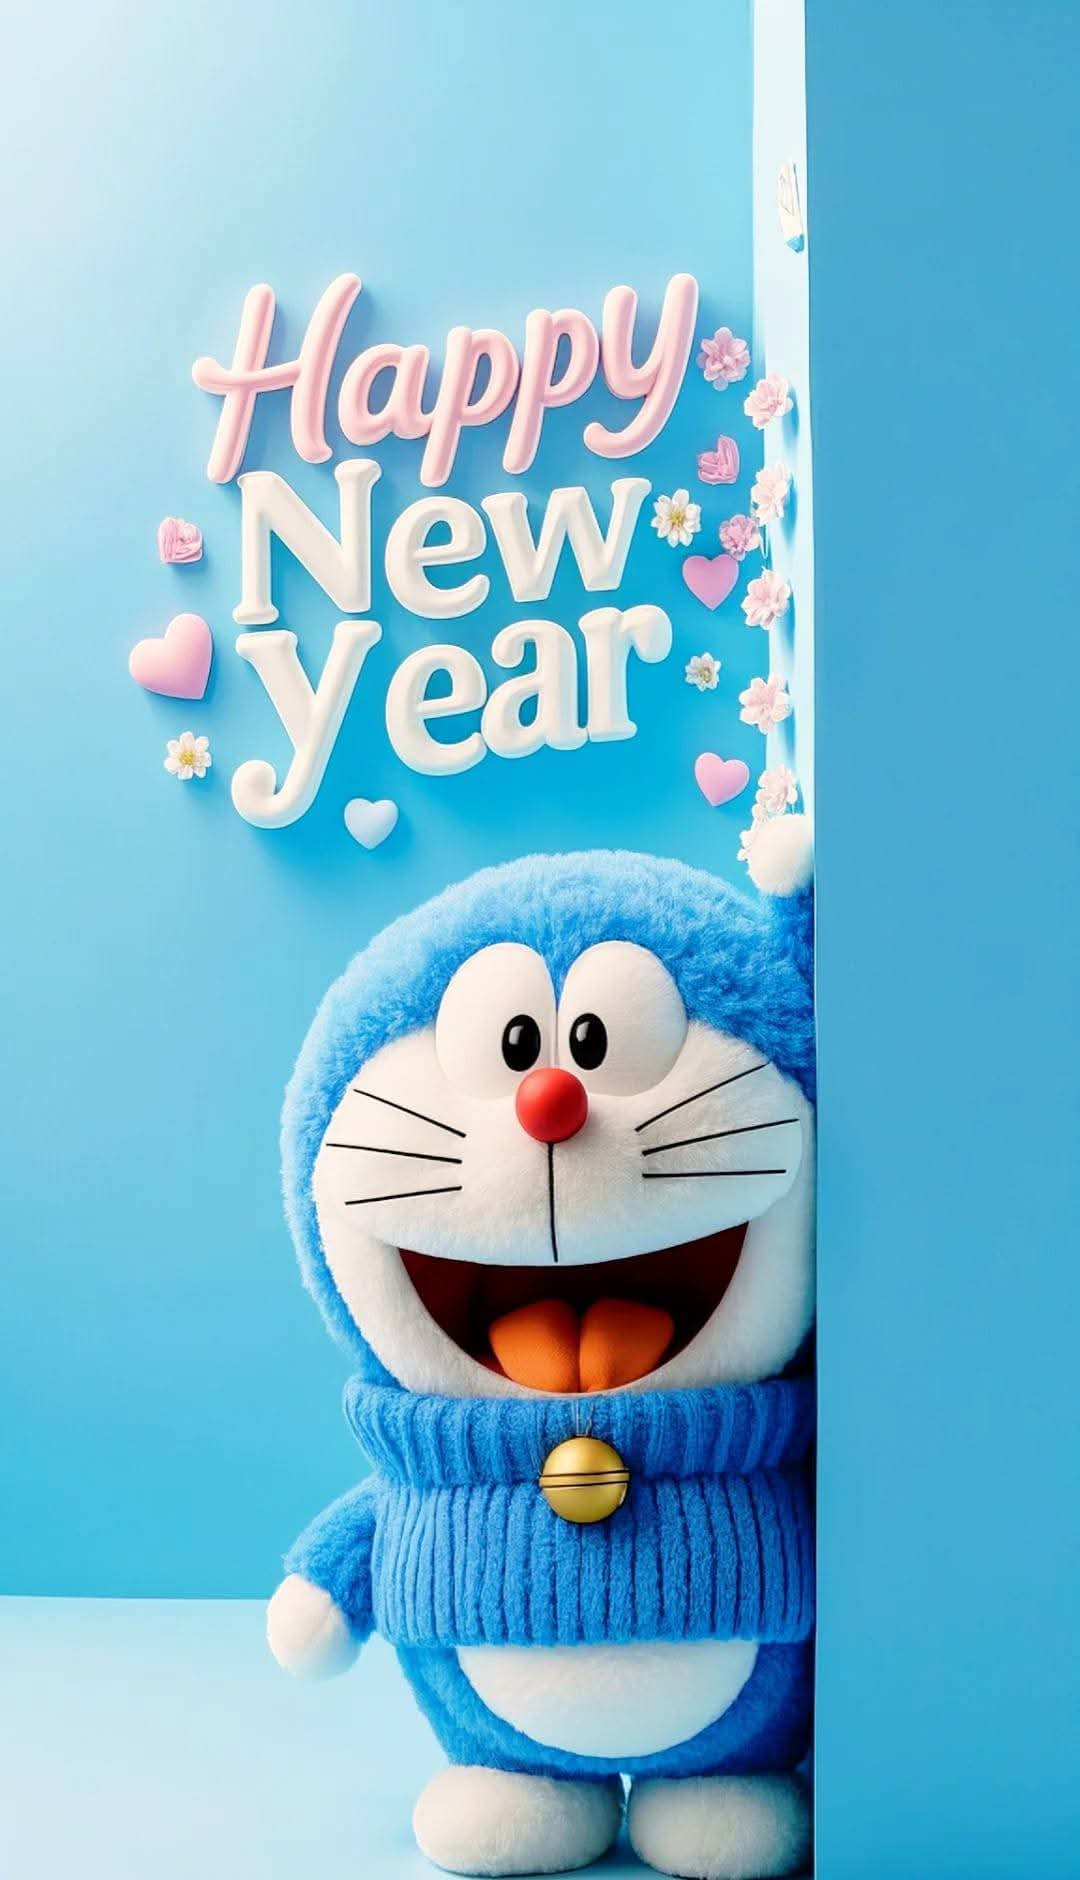